# Feature selection
Purpose: 
- Perform feature selection to find the best set of features for out Machine learning models.  
- Reduce model complexity 

### Table of Contents
- Filter Methods
  - Correlation Coefficient
- Future Work: Other methods for feature selection

<br>

In [1]:
import pandas as pd
df = pd.read_csv("data/cleaned_df.csv",  index_col=False)
df = df.iloc[: , 1:]
df.head()

,year_month,us_state,make,phone_series,phone_launch_date,model_family,predecessor,successor,model_age_days,model_age_months,...,closing_subs_monthly,filed_claims,claims,claims_swap,claims_replacement,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
0,2019-01-01,California,Oppo,OPPO A10,2017-11-01,OPPO A12,First Model,OPPO A15,456,14,...,137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2019-02-01,California,Oppo,OPPO A10,2017-11-01,OPPO A12,First Model,OPPO A15,484,15,...,152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2019-03-01,California,Oppo,OPPO A10,2017-11-01,OPPO A12,First Model,OPPO A15,515,16,...,162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2019-04-01,California,Oppo,OPPO A10,2017-11-01,OPPO A12,First Model,OPPO A15,545,17,...,173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2019-05-01,California,Oppo,OPPO A10,2017-11-01,OPPO A12,First Model,OPPO A15,576,18,...,179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<br>

# Filter Methods
## Correlation Coefficient
If two features are correlated, we can predict one feature from the other. Hence, we can drop one of the feature, as the second one does not add additional information.  

Here, we set the correlation threshold for highly correlated features as `0.8`. If two features are highly correlated, we can drop the feature with a lower correlation coefficient value to the target variable.  However, this is not applicable in our case since our target variable is a categorical variable.   


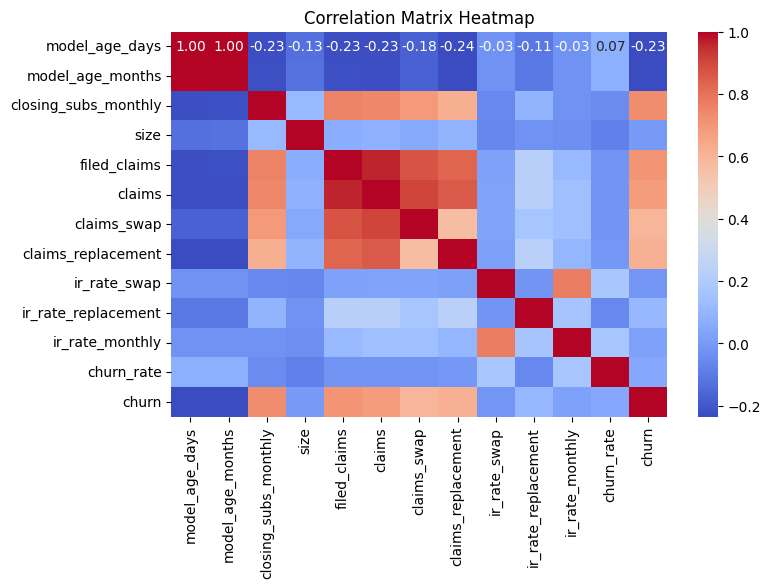

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_columns = ['model_age_days', 'model_age_months', 'closing_subs_monthly', 'size', 'filed_claims', 'claims', 'claims_swap',
                  'claims_replacement', 'ir_rate_swap', 'ir_rate_replacement', 'ir_rate_monthly', 'churn_rate', 'churn']
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
correlation_matrix

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [4]:
correlation_matrix

,model_age_days,model_age_months,closing_subs_monthly,size,filed_claims,claims,claims_swap,claims_replacement,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
model_age_days,1.000000,0.999793,-0.225929,-0.131367,-0.225713,-0.228576,-0.176002,-0.235025,-0.025576,-0.108062,-0.028481,0.073336,-0.232566
model_age_months,0.999793,1.000000,-0.224467,-0.126362,-0.224230,-0.226968,-0.174980,-0.233107,-0.025421,-0.108061,-0.027701,0.073406,-0.231136
closing_subs_monthly,-0.225929,-0.224467,1.000000,0.115166,0.754121,0.740948,0.686443,0.619938,-0.056896,0.090344,-0.029354,-0.049979,0.727576
size,-0.131367,-0.126362,0.115166,1.000000,0.064446,0.078566,0.053007,0.089950,-0.064366,-0.026045,-0.040680,-0.084402,-0.003171
filed_claims,-0.225713,-0.224230,0.754121,0.064446,1.000000,0.963792,0.872348,0.831541,0.021129,0.225249,0.112814,-0.018697,0.707497
claims,-0.228576,-0.226968,0.740948,0.078566,0.963792,1.000000,0.908294,0.858896,0.027170,0.226005,0.136878,-0.018313,0.683679
claims_swap,-0.176002,-0.174980,0.686443,0.053007,0.872348,0.908294,1.000000,0.565881,0.030358,0.169655,0.138334,-0.021770,0.597550
claims_replacement,-0.235025,-0.233107,0.619938,0.089950,0.831541,0.858896,0.565881,1.000000,0.016382,0.237729,0.100414,-0.009441,0.615895
ir_rate_swap,-0.025576,-0.025421,-0.056896,-0.064366,0.021129,0.027170,0.030358,0.016382,1.000000,-0.021480,0.770452,0.175998,-0.016282
ir_rate_replacement,-0.108062,-0.108061,0.090344,-0.026045,0.225249,0.226005,0.169655,0.237729,-0.021480,1.000000,0.163365,-0.057110,0.112031


**Observation**  
- correlation between `model_age_days` and `model_age_months` is 0.999793. We shall drop `model_age_days`.  
- correlation between `filed_claims` and `claims` is 0.963792. We shall drop `filed_claims`.  
- correlation between`claims` and `claims_swap` is 0.908294. We shall drop `claims_swap`.  
- correlation between`claims` and `claims_replacement` 0.858896.  We shall drop `claims_replacement`.   

In [5]:
df1 = df.copy()
df1.drop(['model_age_days', 'filed_claims', 'claims_swap', 'claims_replacement'], axis = 1, inplace = True) 

Correlation matrix after dropping 4 columns

In [6]:
numerical_columns = df.select_dtypes(include=np.number)
correlation_matrix = numerical_columns.corr()
correlation_matrix

print("Before dropping high correlated features: ", df.shape)
print("After dropping high correlated features: ", df1.shape)

Before dropping high correlated features:  (11253, 25)
After dropping high correlated features:  (11253, 21)


In addition, we can drop `phone_launch_date` since we already have `model_age_days` in our dataset. 

In [7]:
df2 = df1.copy()
df2.drop(['phone_launch_date'], axis = 1, inplace = True) 

print("Final dataset shape: ", df2.shape)

Final dataset shape:  (11253, 20)


In [8]:
df2.to_csv('data/cleaned_df_v2.csv')
df2.shape #(11253, 20)
df2.head()

,year_month,us_state,make,phone_series,model_family,predecessor,successor,model_age_months,model,sku,sku_no_colour,colour,size,closing_subs_monthly,claims,ir_rate_swap,ir_rate_replacement,ir_rate_monthly,churn_rate,churn
0,2019-01-01,California,Oppo,OPPO A10,OPPO A12,First Model,OPPO A15,14,A12 32GB BLUE,A12BLU,A12,Blue,32,137,0.0,0.0,0.0,0.0,0.0,0
1,2019-02-01,California,Oppo,OPPO A10,OPPO A12,First Model,OPPO A15,15,A12 32GB BLUE,A12BLU,A12,Blue,32,152,0.0,0.0,0.0,0.0,0.0,0
2,2019-03-01,California,Oppo,OPPO A10,OPPO A12,First Model,OPPO A15,16,A12 32GB BLUE,A12BLU,A12,Blue,32,162,0.0,0.0,0.0,0.0,0.0,0
3,2019-04-01,California,Oppo,OPPO A10,OPPO A12,First Model,OPPO A15,17,A12 32GB BLUE,A12BLU,A12,Blue,32,173,0.0,0.0,0.0,0.0,0.0,0
4,2019-05-01,California,Oppo,OPPO A10,OPPO A12,First Model,OPPO A15,18,A12 32GB BLUE,A12BLU,A12,Blue,32,179,0.0,0.0,0.0,0.0,0.0,0


<br>

# Future Work: Other methods for feature selection
## Forward Feature Selection

Forward Feature Selection is a **stepwise feature selection technique** that begins with an empty model (no features) and progressively adds features that improve model performance. Here's how it works:

- Start with no features: Begin with an empty model.
- Add one feature at a time: Test each feature individually by adding it to the model.
- Select the best feature: Add the feature that improves model performance the most (based on a chosen metric like accuracy, AUC, etc.).
- Repeat: Continue adding one feature at a time, selecting the one that provides the greatest improvement in model performance at each step.
- Stop when no improvement: Stop when adding more features does not significantly improve performance, or after a predefined number of features are selected.

## Backward Feature Elimination
- Selects the most relevant features for a model by removing the least relevant ones one at a time.

## Principal Component Analysis (PCA)
- Reduces the dimensionality of the data by transforming it into a new set of features that are linear combinations of the original 